# **Can an A.I. win Battleship with reinforcement learning?**

## **By: Nate Bennick, James Silva and Trevor Lee**
### Main objective:

Welcome to our Battleship game project, where we explore the exciting world of reinforcement learning (RL) algorithms! In this project, we aim to train AI agents to play the classic Battleship game using various RL techniques.

We begin by importing code from a base implementation available online and modifying it to suit our specific requirements. Our modifications involve creating new algorithms and modifying existing RL algorithms in the code base. Those are the following:

1. **Epsilon Greedy Q-learning:** We have customized the reward system to enhance the agent's learning process and modified the existing Epsilon Greedy methods from the original code base to match our environment.

2. **Heat Map:** We have created a dynamically changing heat map to provide two methods for the AI to guess in. Those are HUNT mode and SEARCH mode.
   
2. **Parity Search:** Utilizing a checkered board pattern, our agent employs hunt and target strategies to optimize gameplay.

3. **Monte Carlo Algorithm:** Leveraging Monte Carlo tree search, our agent makes informed decisions based on simulations of future game states.

We will compare the performance of these algorithms by measuring their effectiveness against each other and against a human player. By analyzing factors such as the number of actions taken and the quality of decision-making, we aim to determine the most effective strategy for winning the Battleship game. Let the battle begin!


### Layout of notebook:
1.   Base Code Implementation
      *   Copying over the code
      *   Making adjustments to get it to work

2.   Modified Base Code with Epsilon Greedy to fit our game
      *   Bigger game size (e.g. more ships and larger map)
      *   Implementation of rules (e.g. ship placement)
      *   Their way is not effective, random and does use Q-learning in a way

3.   Battleship game for humans
      *   User can play the game
      *   Human techniques (e.g. picking all the edges first, then working inward)
      *   Results of human trials

4.   Implementation of the Heat Map
      *   Recreating the entire environment to run with heat map
      *   Results of Heat Map

5.   Implementation of Monte Carlo
      *   Ships have to be static, probability algorithm
      *   Results of Monte Carlo

6.   Implementation of Parity Search
      *   Checkerd-board pattern for hunt and reward based for target
      *   Hunt and Target modes
      *   Results of Parity Search

7.   Results and final remarks
      *   Best algorithm
      *   Human or A.I. better at Battleship
      *   Goals acheived and not achieved on project (NN of Q-Learning)

8.    Citations


### 1. BASE CODE

Below we have implemented a base code for the game battleship from the following link:

*   https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01

We had to make several modifications and updates from the base code due to several depreciated methods and the ensure the base code can run in our base environment. We finally were able to get the base code to run, which is down below.



In [ ]:
# When starting up notebook, need to run this code cell to have gym work correctly along with the stable-baseline3

!pip install gymnasium
!pip install stable-baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyl

In [ ]:
# Import the libraries. Using gym for the enviroment making and matplot for plotting results
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# randomly places a ship on a board
def set_ship(ship, ships, board, ship_locs):

    grid_size = board.shape[0]

    done = False
    while not done:
        init_pos_i = np.random.randint(0, grid_size)
        init_pos_j = np.random.randint(0, grid_size)

        move_j = grid_size - init_pos_j - ships[ship]# horizontal
        if move_j > 0:
            move_j = 1
        else:
            move_j = -1
        move_i = grid_size - init_pos_i - ships[ship] # vertical
        if move_i > 0:
            move_i = 1
        else:
            move_i = -1
        # choose if placing ship horizontally or vertically
        choice_hv = np.random.choice(['h', 'v']) # horizontal, vertical
        if choice_hv == 'h': #horizontal
            j = [(init_pos_j + move_j*jj) for jj in range(ships[ship])]
            i = [init_pos_i for ii in range(ships[ship])]
            pos = set(zip(i,j))
            if all([board[i,j]==0 for (i,j) in pos]):
                done = True
        elif choice_hv == 'v':
            i = [(init_pos_i + move_i*ii) for ii in range(ships[ship])]
            j = [init_pos_j for jj in range(ships[ship])]
            pos = set(zip(i,j))
            #check if empty board in this direction
            if all([board[i,j]==0 for (i,j) in pos]):
                done = True
    # set ship - see convention
    for (i,j) in pos:
        board[i,j] = 1
        ship_locs[ship].append((i,j))

    return board, ship_locs

def board_rendering(grid_size, board):
    for i in range(grid_size):
        print("-"*(4*grid_size+2))
        for j in range(grid_size):
            current_state_value = board[i,j]
            current_state = ('S' if current_state_value==1 else ' ')
            print(" | ", end="")
            print(current_state, end='')
        print(' |')
    print("-"*(4*grid_size+2))

In [ ]:
class BattleshipEnv(gym.Env):

    """Custom Environment that follows gym interface"""
    """see https://github.com/openai/gym/blob/master/gym/core.py"""

    metadata = {'render.modes': ['human']}


    def __init__(self, enemy_board, ship_locs, grid_size, ships):

        super(BattleshipEnv, self).__init__()

        #ships
        self.ships = ships

        # board size
        self.grid_size = grid_size
        # cell state encoding (empty, hit, miss)
        self.cell = {'E': 0, 'X': 1, 'O': -1}
        # boards, actions, rewards
        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')
        # enemy_board must be encoded with 0: empy and 1: ship cell
        self.is_enemy_set = False
        self.enemy_board = enemy_board
        self.ship_locs = ship_locs
        if self.enemy_board is None:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)
            self.is_enemy_set = True
        # reward discount
        self.rdisc = 0
        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # Define action and observation space
        # They must be gym.spaces objects
        # In our case the action space is discrete: index of action
        self.action_space = spaces.Discrete(self.grid_size * self.grid_size)
        # The observation will be the state or configuration of the board
        self.observation_space = spaces.Box(low=-1, high=1,shape=(self.grid_size, self.grid_size),
                                            dtype=np.int64)

    # action will be an index in action_space if from epsilon-greedy
    # or from model prediction
    def step(self, action):

        # board situation before the action
        state = self.board.copy()
        empty_cnts_pre, hit_cnts_pre, miss_cnts_pre = self.board_config(state)

        # action coordinates generated or predicted by the agent in the action_space
        i, j = np.unravel_index(action, (self.grid_size,self.grid_size))

        # lose 1 point for any action
        reward = -1
        # assign a penalty for each illegal action used instead of a legal one
        if (i,j) not in self.legal_actions:
            reward -= 2*self.grid_size
            action_idx = np.random.randint(0,len(self.legal_actions))

            i,j = self.legal_actions[action_idx]
            action = np.ravel_multi_index((i,j), (self.grid_size,self.grid_size))

        # set new state after performing action (scoring board is updated)
        self.set_state((i,j))
        # update legal actions and action_space
        self.set_legal_actions((i,j))

        # new state on scoring board - this includes last action
        next_state = self.board

        # board situation after action
        empty_cnts_post, hit_cnts_post, miss_cnts_post = self.board_config(next_state)

        terminated = bool(hit_cnts_post == sum(self.ships.values()))
        truncated = False  # Assume no early truncation in this simple game.

        # reward for a hit
        if hit_cnts_post-hit_cnts_pre==1:
            # Update hit counts and use it to reward
            r_discount = 1#0.5**self.rdisc
            rp = (self.grid_size*self.grid_size if terminated else self.grid_size)
            reward += rp*r_discount
            #print('HIT!!!')

        reward = float(reward)

        #print('reward:', reward)
        # store the current value of the portfolio here
        info = {}

        return next_state, reward, terminated, truncated, info



    def reset(self, seed=None):
        # Reset the state of the environment to an initial state
        """
        Important: the observation must be a numpy array
        :return: (np.array)
        """
        info = {}

        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')

        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # generate a random board again if it was set randomly before
        if self.is_enemy_set:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            self.ship_locs = {}
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)

        self.rdisc = 0

        return self.board, info

    # Render the environment to the screen
    def render(self, mode='human'):
        for i in range(self.grid_size):
            print("-"*(4*self.grid_size+2))
            for j in range(self.grid_size):
                current_state_value = self.board[i,j]
                current_state = list(self.cell.keys())[list(self.cell.values()).index(current_state_value)]
                current_state = (current_state if current_state!='E' else ' ')
                print(" | ", end="")
                print(current_state, end='')
            print(' |')
        print("-"*(4*self.grid_size+2))

    ####### HELPER FUNCTIONS ###########

    def board_config(self, state):
        uni_states, uni_cnts = np.unique(state.ravel(), return_counts=True)
        empty_cnts = uni_cnts[uni_states==self.cell['E']]
        hit_cnts = uni_cnts[uni_states==self.cell['X']]
        miss_cnts = uni_cnts[uni_states==self.cell['O']]
        if len(empty_cnts)==0:
            empty_cnts = 0
        else:
            empty_cnts = empty_cnts[0]
        if len(hit_cnts)==0:
            hit_cnts = 0
        else:
            hit_cnts = hit_cnts[0]
        if len(miss_cnts)==0:
            miss_cnts = 0
        else:
            miss_cnts = miss_cnts[0]

        return empty_cnts, hit_cnts, miss_cnts

    # set board configuration and state value after player action
    def set_state(self, action):
        i , j = action
        if self.enemy_board[i,j]==1:
            self.board[i,j]=self.cell['X']
        else:
            self.board[i,j]=self.cell['O']

    # set legal actions (empty board locations)
    def set_legal_actions(self, action):
        if action in self.legal_actions:
            self.legal_actions.remove(action)

In [ ]:
# validate environment with one ship (either random or user-defined) on 5x5 board

from stable_baselines3.common.env_checker import check_env
import numpy as np

# ships
ships = {}
ships['cruiser'] = 3

grid_size = 5
# for pre-determined board
enemy_board = np.zeros((grid_size, grid_size), dtype='int')
enemy_board[0,1] = 1
enemy_board[1,1] = 1
enemy_board[2,1] = 1
ship_locs = {}
ship_locs['cruiser'] = [(0,1),(1,1),(2,1)]
env = BattleshipEnv(enemy_board=enemy_board, ship_locs=ship_locs, grid_size=grid_size, ships=ships)
# for random board
#env = BattleshipEnv(enemy_board=None, ship_locs={}, grid_size=grid_size)
# If the environment doesn't follow the interface, an error will be thrown
check_env(env, warn=True)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [ ]:
env.enemy_board, env.ship_locs

(array([[0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 {'cruiser': [(0, 1), (1, 1), (2, 1)]})

In [ ]:
# Test environment
# ships
ships = {}
ships['cruiser'] = 3

grid_size=5
env = BattleshipEnv(enemy_board=None, ship_locs={}, grid_size=grid_size, ships=ships)

for ep in range(2):
    print('Episode', ep)
    obs = env.reset()
    #env.render()
    #print(env.enemy_board)
    terminated = False
    t = 0
    while not terminated:
        action = env.action_space.sample()
        i, j = np.unravel_index(action, (grid_size,grid_size))
        print("Action {}".format(t + 1), i, j)
        obs, reward, terminated, truncated, info = env.step(action)
        print('obs=', obs, 'reward=', reward, 'terminated=', terminated)
        env.render()
        t += 1
        if terminated:
            print("Goal reached!", "reward=", reward)

Episode 0
Action 1 1 0
obs= [[ 0  0  0  0  0]
 [-1  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] reward= -1.0 terminated= False
----------------------
 |   |   |   |   |   |
----------------------
 | O |   |   |   |   |
----------------------
 |   |   |   |   |   |
----------------------
 |   |   |   |   |   |
----------------------
 |   |   |   |   |   |
----------------------
Action 2 1 0
obs= [[ 0  0  0  0  0]
 [-1  0  0  1  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] reward= -6.0 terminated= False
----------------------
 |   |   |   |   |   |
----------------------
 | O |   |   | X |   |
----------------------
 |   |   |   |   |   |
----------------------
 |   |   |   |   |   |
----------------------
 |   |   |   |   |   |
----------------------
Action 3 4 2
obs= [[ 0  0  0  0  0]
 [-1  0  0  1  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0 -1  0  0]] reward= -1.0 terminated= False
----------------------
 |   |   |   |   |   |
------------------

### Discussion of base code preformance

With this base code that we pulled, we noticied a few things that needed to be changed or added to fit for our standards and how our own game will be played. The following is what we made changes to for the baseline code:


*   Made grid size bigger to an 8x8, this will allow for more ships
*   Added more ships, so there is 3 ships (lengths: 1 cell, 2 cells, and 3 cells)
*   Cannot place ships next to each other, so the randomized ships will be atleast one cell apart from each other
*   When a ship is fully sunken, all the cells around the sunken ship will be marked, this will make the game go faster and obeys the one cell apart rule

With these modifications to the epsilon greedy method that was already present in the Code base, we have what follows:





### 2. Modified Base Code to fit our game - Epsilon Greedy Q Learning

In [ ]:
def set_ship(ship, ships, board, ship_locs):

    grid_size = board.shape[0]
    ship_length = ships[ship]
    separation = 1

    done = False
    while not done:
        init_pos_i = np.random.randint(0, grid_size)
        init_pos_j = np.random.randint(0, grid_size)

        # Choose whether to place the ship horizontally or vertically
        choice_hv = np.random.choice(['h', 'v'])  # horizontal, vertical

        if choice_hv == 'h':  # Horizontal placement
            # Check if placing ship horizontally is possible without overlap, so no ships can be placed next to each other
            if init_pos_j + ship_length + separation <= grid_size and \
                    all(0 <= init_pos_i + di < grid_size and 0 <= init_pos_j + dj < grid_size and
                        board[init_pos_i + di, init_pos_j + dj] == 0
                        for di in range(-1, 2)
                        for dj in range(-1, ship_length + 1)):
                done = True
                # Mark the ship's positions
                for offset in range(ship_length):
                    board[init_pos_i, init_pos_j + offset] = 1
                    ship_locs[ship].append((init_pos_i, init_pos_j + offset))

        elif choice_hv == 'v':  # Vertical placement
            # Check if placing ship vertically is possible without overlap, so no ships can be placed next to each other
            if init_pos_i + ship_length + separation <= grid_size and \
                    all(0 <= init_pos_i + di < grid_size and 0 <= init_pos_j + dj < grid_size and
                        board[init_pos_i + di, init_pos_j + dj] == 0
                        for di in range(-1, ship_length + 1)
                        for dj in range(-1, 2)):
                done = True
                # Mark the ship's positions
                for offset in range(ship_length):
                    board[init_pos_i + offset, init_pos_j] = 1
                    ship_locs[ship].append((init_pos_i + offset, init_pos_j))

    return board, ship_locs

def board_rendering(grid_size, board):

    for i in range(grid_size):
        print("-"*(4*grid_size+2))
        for j in range(grid_size):
            current_state_value = board[i,j]
            current_state = ('S' if current_state_value==1 else ' ')
            print(" | ", end="")
            print(current_state, end='')
        print(' |')
    print("-"*(4*grid_size+2))


In [ ]:
class BattleshipEnv(gym.Env):

    """Custom Environment that follows gym interface"""
    """see https://github.com/openai/gym/blob/master/gym/core.py"""

    metadata = {'render.modes': ['human']}


    def __init__(self, enemy_board, ship_locs, grid_size, ships):

        super(BattleshipEnv, self).__init__()

        #ships
        self.ships = ships

        # board size
        self.grid_size = grid_size
        # cell state encoding (empty, hit, miss)
        self.cell = {'E': 0, 'X': 1, 'O': -1}
        # boards, actions, rewards
        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')
        # enemy_board must be encoded with 0: empy and 1: ship cell
        self.is_enemy_set = False
        self.enemy_board = enemy_board
        self.ship_locs = ship_locs
        if self.enemy_board is None:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)
            self.is_enemy_set = True
        # reward discount
        self.rdisc = 0
        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # Define action and observation space
        # They must be gym.spaces objects
        # In our case the action space is discrete: index of action
        self.action_space = spaces.Discrete(self.grid_size * self.grid_size)
        # The observation will be the state or configuration of the board
        self.observation_space = spaces.Box(low=-1, high=1,shape=(self.grid_size, self.grid_size),
                                            dtype=np.int64)

    # action will be an index in action_space if from epsilon-greedy
    # or from model prediction

    def step(self, action):

        # board situation before the action
        state = self.board.copy()
        empty_cnts_pre, hit_cnts_pre, miss_cnts_pre = self.board_config(state)

        # action coordinates generated or predicted by the agent in the action_space
        i, j = np.unravel_index(action, (self.grid_size, self.grid_size))

        # lose 1 point for any action
        reward = -1

        # assign a penalty for each illegal action used instead of a legal one
        if (i, j) not in self.legal_actions:
            reward -= 2 * self.grid_size
            action_idx = np.random.randint(0, len(self.legal_actions))
            i, j = self.legal_actions[action_idx]
            action = np.ravel_multi_index((i, j), (self.grid_size, self.grid_size))

        # set new state after performing action (scoring board is updated)
        self.set_state((i, j))

        # update legal actions and action_space
        self.set_legal_actions((i, j))

        # new state on scoring board - this includes last action
        next_state = self.board

        # board situation after action
        empty_cnts_post, hit_cnts_post, miss_cnts_post = self.board_config(next_state)

        # Check if any ship has been sunk
        sunk_ships = {ship: False for ship in self.ships.keys()}
        for ship, locs in self.ship_locs.items():
            if all(next_state[loc] == self.cell['X'] for loc in locs):
                sunk_ships[ship] = True

        # Mark surrounding cells as misses for sunk ships, to notify that there will be no ships next to each other
        for ship, sunk in sunk_ships.items():
            if sunk:
                for loc in self.ship_locs[ship]:
                    i, j = loc
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            ni, nj = i + di, j + dj
                            if 0 <= ni < self.grid_size and 0 <= nj < self.grid_size and next_state[ni, nj] == self.cell['E']:
                                next_state[ni, nj] = self.cell['O']

        terminated = bool(hit_cnts_post == sum(self.ships.values()))
        truncated = False  # Assume no early truncation in this simple game.

        # reward for a hit
        if hit_cnts_post - hit_cnts_pre == 1:
            # Update hit counts and use it to reward
            r_discount = 1  # 0.5**self.rdisc
            rp = (self.grid_size * self.grid_size if terminated else self.grid_size)
            reward += rp * r_discount

        reward = float(reward)

        info = {}

        return next_state, reward, terminated, truncated, info


    def reset(self, seed=None):
        # Reset the state of the environment to an initial state
        """
        Important: the observation must be a numpy array
        :return: (np.array)
        """
        info = {}

        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')

        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # generate a random board again if it was set randomly before
        if self.is_enemy_set:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            self.ship_locs = {}
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)

        self.rdisc = 0

        return self.board, info

    # Render the environment to the screen
    def render(self, mode='human'):
        for i in range(self.grid_size):
            print("-"*(4*self.grid_size+2))
            for j in range(self.grid_size):
                current_state_value = self.board[i,j]
                current_state = list(self.cell.keys())[list(self.cell.values()).index(current_state_value)]
                current_state = (current_state if current_state!='E' else ' ')
                print(" | ", end="")
                print(current_state, end='')
            print(' |')
        print("-"*(4*self.grid_size+2))

    ####### HELPER FUNCTIONS ###########

    def board_config(self, state):
        uni_states, uni_cnts = np.unique(state.ravel(), return_counts=True)
        empty_cnts = uni_cnts[uni_states==self.cell['E']]
        hit_cnts = uni_cnts[uni_states==self.cell['X']]
        miss_cnts = uni_cnts[uni_states==self.cell['O']]
        if len(empty_cnts)==0:
            empty_cnts = 0
        else:
            empty_cnts = empty_cnts[0]
        if len(hit_cnts)==0:
            hit_cnts = 0
        else:
            hit_cnts = hit_cnts[0]
        if len(miss_cnts)==0:
            miss_cnts = 0
        else:
            miss_cnts = miss_cnts[0]

        return empty_cnts, hit_cnts, miss_cnts

    # set board configuration and state value after player action
    def set_state(self, action):
        i , j = action
        if self.enemy_board[i,j]==1:
            self.board[i,j]=self.cell['X']
        else:
            self.board[i,j]=self.cell['O']

    # set legal actions (empty board locations)
    def set_legal_actions(self, action):
        if action in self.legal_actions:
            self.legal_actions.remove(action)

In [ ]:
# Test environment
# ships
ships = {}
# Added more ships, so there is a variety and to test out makring around sunken ships
ships['Aircraft Carrier'] = 3
ships['Battleship'] = 2
ships['U-boat'] = 1

grid_size=8   # Set to 8, larger grid for our own game
env = BattleshipEnv(enemy_board=None, ship_locs={}, grid_size=grid_size, ships=ships)

for ep in range(1): #Change how many runs
    print('Episode', ep)
    obs = env.reset()
    #env.render()
    #print(env.enemy_board)
    terminated = False
    t = 0
    while not terminated:
        action = env.action_space.sample()
        i, j = np.unravel_index(action, (grid_size,grid_size))
        print("Action {}".format(t + 1), i, j)
        obs, reward, terminated, truncated, info = env.step(action)
        print('obs=', obs, 'reward=', reward, 'terminated=', terminated)
        env.render()
        t += 1
        if terminated:
            print("Goal reached!", "reward=", reward)

Episode 0
Action 1 6 4
obs= [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0]] reward= -1.0 terminated= False
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   | O |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
Action 2 6 5
obs= [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 

#### Episodes

Now that the code has been verified to run, we are going to run the model for 50,000 episodes to get try and get the least number of moves to win the game.

In [ ]:
import numpy as np

# Assuming you have a setup for the BattleshipEnv and other necessary components
# ships and grid_size are defined outside this code block

# Initialize the environment
env = BattleshipEnv(enemy_board=None, ship_locs={}, grid_size=grid_size, ships=ships)

num_games = 50000
game_results = []
moves_per_game = []

for game in range(num_games):
    obs, _ = env.reset()
    terminated = False
    game_moves = []
    total_reward = 0
    curr_moves = 0

    while not terminated:
        action = env.action_space.sample()  # Replace with your epsilon-greedy policy if needed
        obs, reward, terminated, _, _ = env.step(action)
        total_reward += reward

        # Record the action taken
        i, j = np.unravel_index(action, (env.grid_size, env.grid_size))
        game_moves.append((i, j, reward))  # Store move and its immediate reward
        curr_moves += 1

    game_results.append(total_reward)
    moves_per_game.append(curr_moves)

# Analyze results
min_moves = min(moves_per_game)
max_moves = max(moves_per_game)
average_moves = sum(moves_per_game) / len(moves_per_game)

print(f"Minimum moves in a game: {min_moves}")
print(f"Maximum moves in a game: {max_moves}")
print(f"Average moves per game: {average_moves}")


Minimum moves in a game: 9
Maximum moves in a game: 64
Average moves per game: 55.70972


### 3. Battleship game for humans

Below has the same layout as the modified game above, where it is 8x8 with three ships (lengths of 1, 2, and 3 cells) which are randomly placed and follows rules. This allows the user to play as many games as they want by specifying it with the num_of_games. Then it will plot the reward (same reward system as base code) and the number of actions it took to complete and win the game.

In [ ]:

def set_ship(ship, ships, board, ship_locs):
    grid_size = board.shape[0]
    ship_length = ships[ship]
    separation = 1

    done = False
    while not done:
        init_pos_i = np.random.randint(0, grid_size)
        init_pos_j = np.random.randint(0, grid_size)

        # Choose whether to place ship horizontally or vertically
        choice_hv = np.random.choice(['h', 'v'])  # horizontal, vertical

        if choice_hv == 'h':  # Horizontal placement
            # Check if placing ship horizontally is possible without overlap, so no ships can be placed next to each other
            if init_pos_j + ship_length + separation <= grid_size and \
                    all(0 <= init_pos_i + di < grid_size and 0 <= init_pos_j + dj < grid_size and
                        board[init_pos_i + di, init_pos_j + dj] == 0
                        for di in range(-1, 2)
                        for dj in range(-1, ship_length + 1)):
                done = True
                # Mark the ship's positions
                for offset in range(ship_length):
                    board[init_pos_i, init_pos_j + offset] = 1
                    ship_locs[ship].append((init_pos_i, init_pos_j + offset))

        elif choice_hv == 'v':  # Vertical placement
            # Check if placing ship vertically is possible without overlap, so no ships can be placed next to each other
            if init_pos_i + ship_length + separation <= grid_size and \
                    all(0 <= init_pos_i + di < grid_size and 0 <= init_pos_j + dj < grid_size and
                        board[init_pos_i + di, init_pos_j + dj] == 0
                        for di in range(-1, ship_length + 1)
                        for dj in range(-1, 2)):
                done = True
                # Mark the ship's positions
                for offset in range(ship_length):
                    board[init_pos_i + offset, init_pos_j] = 1
                    ship_locs[ship].append((init_pos_i + offset, init_pos_j))

    return board, ship_locs

def board_rendering(grid_size, board):
    for i in range(grid_size):
        print("-"*(4*grid_size+2))
        for j in range(grid_size):
            current_state_value = board[i,j]
            current_state = ('S' if current_state_value==1 else ' ')
            print(" | ", end="")
            print(current_state, end='')
        print(' |')
    print("-"*(4*grid_size+2))


In [ ]:

class BattleshipEnv(gym.Env):

    """Custom Environment that follows gym interface"""
    """see https://github.com/openai/gym/blob/master/gym/core.py"""

    metadata = {'render.modes': ['human']}

    def __init__(self, enemy_board=None, ship_locs=None, grid_size=10, ships=None):

        super(BattleshipEnv, self).__init__()

        #ships
        self.ships = {'carrier': 5, 'battleship': 4, 'cruiser': 3, 'submarine': 3, 'destroyer': 2} if ships is None else ships

        # board size
        self.grid_size = grid_size
        # cell state encoding (empty, hit, miss)
        self.cell = {'E': 0, 'X': 1, 'O': -1}
        # boards, actions, rewards
        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')
        # enemy_board must be encoded with 0: empty and 1: ship cell
        self.is_enemy_set = False
        self.enemy_board = enemy_board
        self.ship_locs = {} if ship_locs is None else ship_locs
        if self.enemy_board is None:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)
            self.is_enemy_set = True
        # reward discount
        self.rdisc = 0
        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # Define action and observation space
        # They must be gym.spaces objects
        # In our case the action space is discrete: index of action
        self.action_space = spaces.Discrete(self.grid_size * self.grid_size)
        # The observation will be the state or configuration of the board
        self.observation_space = spaces.Box(low=-1, high=1,shape=(self.grid_size, self.grid_size),
                                            dtype=np.int64)

    # action will be an index in action_space if from epsilon-greedy
    # or from model prediction

    def step(self, action):

        # board situation before the action
        state = self.board.copy()
        empty_cnts_pre, hit_cnts_pre, miss_cnts_pre = self.board_config(state)

        # action coordinates generated or predicted by the agent in the action_space
        i, j = action

        # lose 1 point for any action
        reward = -1

        # assign a penalty for each illegal action used instead of a legal one
        if (i, j) not in self.legal_actions:
            reward -= 2 * self.grid_size
            action_idx = np.random.randint(0, len(self.legal_actions))
            i, j = self.legal_actions[action_idx]
            action = (i, j)

        # set new state after performing action (scoring board is updated)
        self.set_state(action)

        # update legal actions and action_space
        self.set_legal_actions(action)

        # new state on scoring board - this includes last action
        next_state = self.board

        # board situation after action
        empty_cnts_post, hit_cnts_post, miss_cnts_post = self.board_config(next_state)

        # Check if any ship has been sunk
        sunk_ships = {ship: False for ship in self.ships.keys()}
        for ship, locs in self.ship_locs.items():
            if all(next_state[loc] == self.cell['X'] for loc in locs):
                sunk_ships[ship] = True

        # Mark surrounding cells as misses for sunk ships, to notify that there will be no ships next to each other
        for ship, sunk in sunk_ships.items():
            if sunk:
                for loc in self.ship_locs[ship]:
                    i, j = loc
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            ni, nj = i + di, j + dj
                            if 0 <= ni < self.grid_size and 0 <= nj < self.grid_size and next_state[ni, nj] == self.cell['E']:
                                next_state[ni, nj] = self.cell['O']

        terminated = bool(hit_cnts_post == sum(self.ships.values()))
        truncated = False  # Assume no early truncation in this simple game.

        # reward for a hit
        if hit_cnts_post - hit_cnts_pre == 1:
            # Update hit counts and use it to reward
            r_discount = 1  # 0.5**self.rdisc
            rp = (self.grid_size * self.grid_size if terminated else self.grid_size)
            reward += rp * r_discount

        reward = float(reward)

        info = {}

        return next_state, reward, terminated, truncated

    def reset(self, seed=None):
        # Reset the state of the environment to an initial state
        """
        Important: the observation must be a numpy array
        :return: (np.array)
        """
        info = {}

        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')

        self.legal_actions = [] # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i,j))# this gets updated as an action is performed

        # generate a random board again if it was set randomly before
        if self.is_enemy_set:
            self.enemy_board = 0*np.ones((self.grid_size, self.grid_size), dtype='int')
            self.ship_locs = {}
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)

        self.rdisc = 0

        return self.board

    # Render the environment to the screen
    def render(self, mode='human'):
        for i in range(self.grid_size):
            print("-"*(4*self.grid_size+2))
            for j in range(self.grid_size):
                current_state_value = self.board[i,j]
                current_state = list(self.cell.keys())[list(self.cell.values()).index(current_state_value)]
                current_state = (current_state if current_state!='E' else ' ')
                print(" | ", end="")
                print(current_state, end='')
            print(' |')
        print("-"*(4*self.grid_size+2))

    ####### HELPER FUNCTIONS ###########

    def board_config(self, state):
        uni_states, uni_cnts = np.unique(state.ravel(), return_counts=True)
        empty_cnts = uni_cnts[uni_states==self.cell['E']]
        hit_cnts = uni_cnts[uni_states==self.cell['X']]
        miss_cnts = uni_cnts[uni_states==self.cell['O']]
        if len(empty_cnts)==0:
            empty_cnts = 0
        else:
            empty_cnts = empty_cnts[0]
        if len(hit_cnts)==0:
            hit_cnts = 0
        else:
            hit_cnts = hit_cnts[0]
        if len(miss_cnts)==0:
            miss_cnts = 0
        else:
            miss_cnts = miss_cnts[0]

        return empty_cnts, hit_cnts, miss_cnts

    # set board configuration and state value after player action
    def set_state(self, action):
        i , j = action
        if self.enemy_board[i,j]==1:
            self.board[i,j]=self.cell['X']
        else:
            self.board[i,j]=self.cell['O']

    # set legal actions (empty board locations)
    def set_legal_actions(self, action):
        if action in self.legal_actions:
            self.legal_actions.remove(action)


Episode 0
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
Enter X and Y coordinates separated by space (0-7 0-7): 00
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   |   |   |   |
----------------------------------
 |   |   |   |   |   

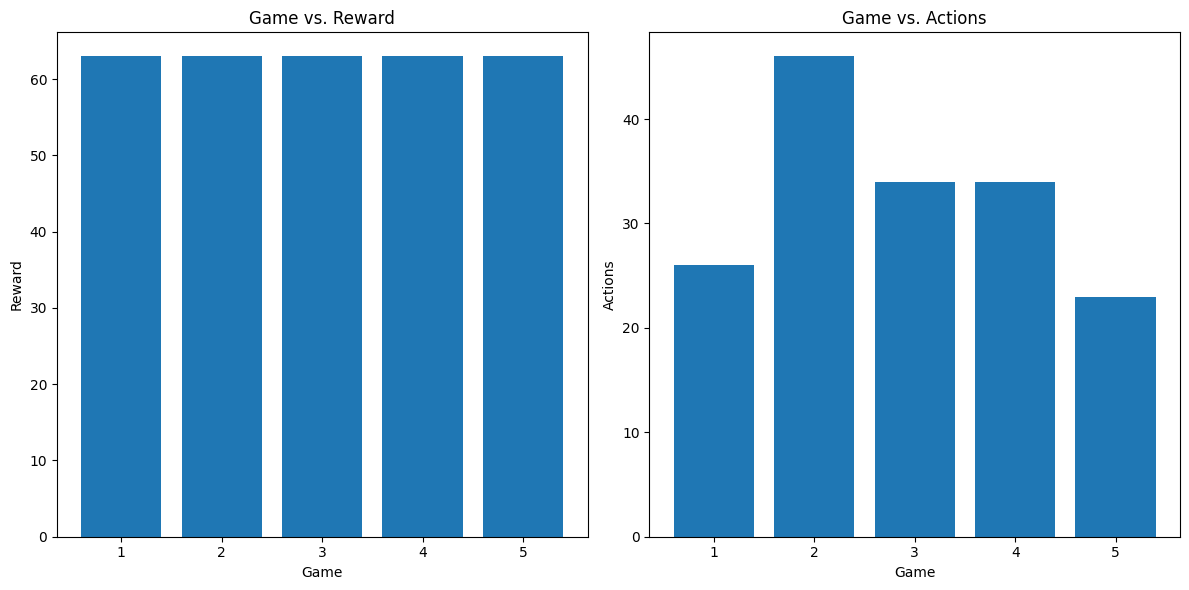

In [ ]:

# Test environment
# ships
ships = {}
# Added more ships, so there is a variety and to test out makring around sunken ships
ships['Aircraft Carrier'] = 3
ships['Battleship'] = 2
ships['U-boat'] = 1

grid_size=8   # Set to 8, larger grid for our own game
env = BattleshipEnv(enemy_board=None, ship_locs={}, grid_size=grid_size, ships=ships)


num_of_games = 5
action_list = []
reward_list = []

# Run the game
for ep in range(num_of_games):
    print('Episode', ep)
    obs = env.reset()
    done = False
    t = 0
    prev_actions = []
    while not done:
        env.render()
        try:
            x, y = map(int, input("Enter X and Y coordinates separated by space (0-7 0-7): ").split())
            if x < 0 or x >= grid_size or y < 0 or y >= grid_size:
                print("Warning: Coordinates out of range. Please enter valid coordinates.")
                continue
            if (x, y) in prev_actions:
                print("Warning: Same coordinates entered again. Please enter different coordinates.")
                continue
        except ValueError:
            print("Warning: Please enter valid integers for coordinates.")
            continue
        action = (x, y)
        prev_actions.append(action)
        observation, reward, done, _ = env.step(action)
        print("Reward:", reward)
        t += 1
        if done:
            print("Game Over!")
            print("Total Actions:", t)
            print("Reward:", reward)
            action_list.append(t)
            reward_list.append(reward)
env.render()

# Plot game statistics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(reward_list) + 1), reward_list)
plt.title('Game vs. Reward')
plt.xlabel('Game')
plt.ylabel('Reward')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(action_list) + 1), action_list)
plt.title('Game vs. Actions')
plt.xlabel('Game')
plt.ylabel('Actions')

plt.tight_layout()
plt.show()


### 4. Implementation of Heat Map

Now that we hav altered the game to fit the standard that we set out to have, we need to change the foundation of how we are training the AI to use q learning instead of the methodology used by the base code.

#### Heat Map Environment

In [ ]:
class BattleshipEnv(gym.Env):
    def __init__(self, grid_size, ships=[(3, 1), (2, 1), (1, 1)]):

        super(BattleshipEnv, self).__init__()

        self.grid_size = grid_size
        self.ships = ships
        self.action_space = gym.spaces.Discrete(grid_size * grid_size)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(grid_size, grid_size), dtype=int)

        self.enemy_board = np.zeros((grid_size, grid_size), dtype=int)
        self.heatmap = np.zeros((grid_size, grid_size), dtype=int)
        self.place_ships()

    def place_ships(self):
        for ship_size, count in self.ships:
            for _ in range(count):
                placed = False
                while not placed:
                    orientation = np.random.choice(['horizontal', 'vertical'])
                    row = np.random.randint(self.grid_size)
                    col = np.random.randint(self.grid_size)
                    if orientation == 'horizontal' and col + ship_size <= self.grid_size:
                        if np.all(self.enemy_board[row, col:col + ship_size] == 0):
                            self.enemy_board[row, col:col + ship_size] = 1
                            placed = True
                    elif orientation == 'vertical' and row + ship_size <= self.grid_size:
                        if np.all(self.enemy_board[row:row + ship_size, col] == 0):
                            self.enemy_board[row:row + ship_size, col] = 1
                            placed = True

    # here is the main step function, which will use the heat map to take accurate guesses
    def step(self, action):
        row = action // self.grid_size
        col = action % self.grid_size

        # prevent guessing on a spot that has already been gussed
        if self.enemy_board[row, col] == -1:
            return self.heatmap.copy(), -1, False, {}

        # hit is boolean value to figure out if we have a hit or not
        if self.enemy_board[row, col] == 1:
            hit = True
        else:
            hit = False
        self.enemy_board[row, col] = -1


#         print("I shot at location: ", row, col)

        if (hit == True):
#             print("I have found a ship, entering HUNT MODE:")

            self.heatmap[row, col] = 1
            adjacent_positions = [
            (row - 1, col),  # Top
            (row + 1, col),  # Bottom
            (row, col - 1),  # Left
            (row, col + 1)   # Right
            ]

            for adj_row, adj_col in adjacent_positions:
                if 0 <= adj_row < self.grid_size and 0 <= adj_col < self.grid_size:
                    if self.enemy_board[adj_row, adj_col] == 0:  # Ensure the spot hasn't been guessed or hit
                        self.heatmap[adj_row, adj_col] = 2
#                         print(f"Setting heatmap at ({adj_row}, {adj_col}) to 0.5")
        else:
            self.heatmap[row, col] = -1

        done = np.all(self.enemy_board[self.enemy_board > 0] == -1)
        reward = 1 if hit else -1
        return self.heatmap.copy(), reward, done, {}

    # reset both the heatmap and the enemy board when the game has finished
    def reset(self):
        self.enemy_board = np.zeros((self.grid_size, self.grid_size), dtype=int)
        self.heatmap = np.zeros((self.grid_size, self.grid_size), dtype=int)
        self.place_ships()
        return self.heatmap.copy()

    # simply for seeing the map for debugging purposes
    def render(self, mode='human'):
        if mode == 'human':
            print("Enemy Board (guessed):")
            print(self.enemy_board)
            print("Heatmap:")
            print(self.heatmap)

    def next_action(self, mode='random'):
        """
        Determine the next action based on the specified mode.
        - 'random': Choose an action randomly from available spots.
        - 'checkerboard': Follow a checkerboard pattern to choose actions systematically.
        """
        if mode == 'checkerboard':
            # Iterate over the grid in a checkerboard pattern
            for row in range(self.grid_size):
                for col in range(row % 2, self.grid_size, 2):  # Start at row%2 and step by 2 for checkerboard
                    if self.enemy_board[row, col] == 0 or self.enemy_board[row, col] == 1:
                        return row * self.grid_size + col

        elif mode == 'random':
            # Select randomly from available spots
            while True:
                action = self.action_space.sample()
                row, col = action // self.grid_size, action % self.grid_size
                if self.enemy_board[row, col] == 0 or self.enemy_board[row, col] == 1:
                    return action

        # If no suitable action found in checkerboard, default to random
        while True:
            action = self.action_space.sample()
            row, col = action // self.grid_size, action % self.grid_size
            if self.enemy_board[row, col] == 0 or self.enemy_board[row, col] == 1:
                return action

#### Random Search

In [ ]:
# Create the environment
env = BattleshipEnv(grid_size=8)

episodes = 50000
moves_per_game_rand = []

# Reset the environment for a new game
observation = env.reset()

# define counter to count moves
moves = 0


for ep in range(episodes):
    env.reset()
    done = False
    current_moves = 0
    while not done:
#         print("starting move:", moves)
#         print('\n')

        # Select a random action
        # action = env.action_space.sample()
        action = env.next_action()
        # Perform the action
        observation, reward, done, info = env.step(action)

        # iterate the move count
        current_moves += 1

    # add moves from last game to list
    moves_per_game_rand.append(current_moves)

max_moves = max(moves_per_game_rand)
min_moves = min(moves_per_game_rand)
avg_moves = sum(moves_per_game_rand) / len(moves_per_game_rand)

print(f"Maximum moves in a game: {max_moves}")
print(f"Minimum moves in a game: {min_moves}")
print(f"Average moves in a game: {avg_moves}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Maximum moves in a game: 64
Minimum moves in a game: 14
Average moves in a game: 55.6777


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


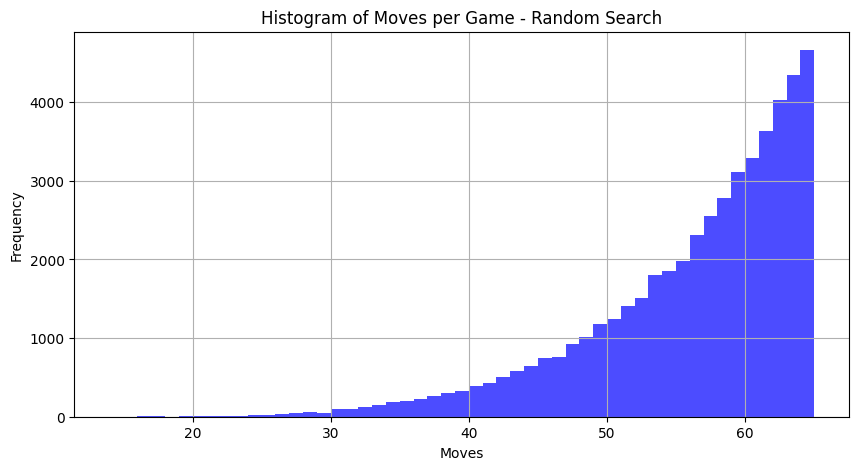

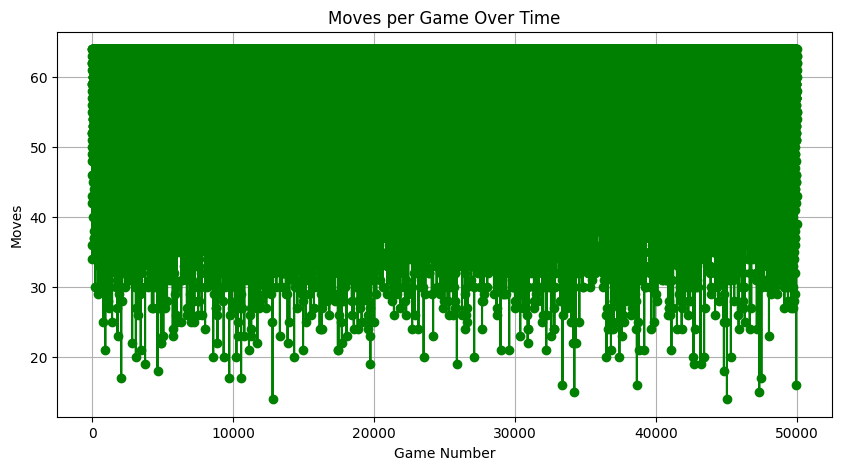

In [ ]:
# Creating a histogram of moves per game
plt.figure(figsize=(10, 5))
plt.hist(moves_per_game_rand, bins=range(min(moves_per_game_rand), max(moves_per_game_rand) + 2), alpha=0.7, color='blue')
plt.title('Histogram of Moves per Game - Random Search')
plt.xlabel('Moves')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Creating a line plot to show trend of moves over games
plt.figure(figsize=(10, 5))
plt.plot(moves_per_game_rand, marker='o', linestyle='-', color='green')
plt.title('Moves per Game Over Time')
plt.xlabel('Game Number')
plt.ylabel('Moves')
plt.grid(True)
plt.show()

#### Checkerboard Search



In [ ]:
# Create the environment
env = BattleshipEnv(grid_size=8)

episodes = 50000
moves_per_game_check = []

# Reset the environment for a new game
observation = env.reset()

# define counter to count moves
moves = 0


for ep in range(episodes):
    env.reset()
    done = False
    current_moves = 0
    while not done:
#         print("starting move:", moves)
#         print('\n')

        # Select a random action
        # action = env.action_space.sample()
        action = env.next_action(mode='checkerboard')
        # Perform the action
        observation, reward, done, info = env.step(action)

        # iterate the move count
        current_moves += 1

    # add moves from last game to list
    moves_per_game_check.append(current_moves)

max_moves = max(moves_per_game_check)
min_moves = min(moves_per_game_check)
avg_moves = sum(moves_per_game_check) / len(moves_per_game_check)

print(f"Maximum moves in a game: {max_moves}")
print(f"Minimum moves in a game: {min_moves}")
print(f"Average moves in a game: {avg_moves}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Maximum moves in a game: 64
Minimum moves in a game: 34
Average moves in a game: 56.46412


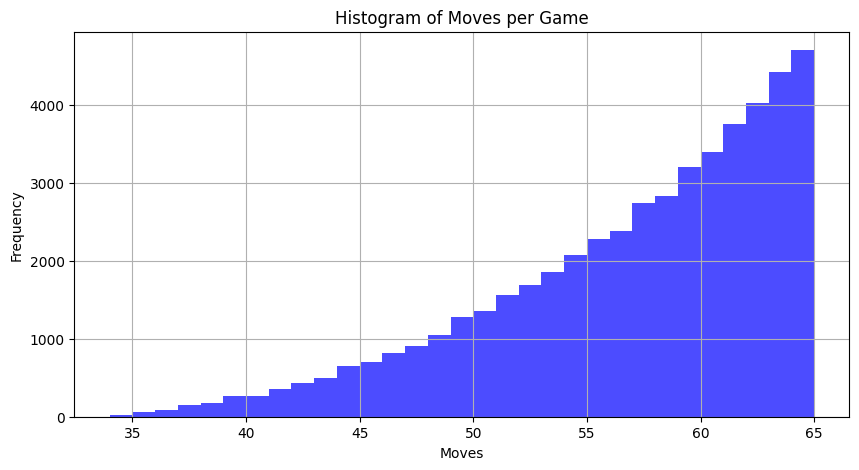

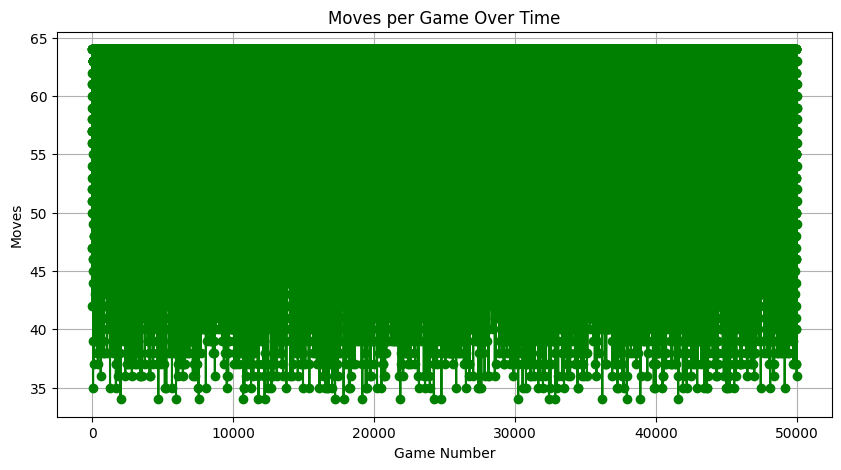

In [ ]:
# Creating a histogram of moves per game
plt.figure(figsize=(10, 5))
plt.hist(moves_per_game_check, bins=range(min(moves_per_game_check), max(moves_per_game_check) + 2), alpha=0.7, color='blue')
plt.title('Histogram of Moves per Game')
plt.xlabel('Moves')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Creating a line plot to show trend of moves over games
plt.figure(figsize=(10, 5))
plt.plot(moves_per_game_check, marker='o', linestyle='-', color='green')
plt.title('Moves per Game Over Time')
plt.xlabel('Game Number')
plt.ylabel('Moves')
plt.grid(True)
plt.show()

### 5. Implementation of Monte Carlo

Below is the implementation of the Monte Carlo algorithm. With this type of algorithm, we had to change the randomized ships to be static so it can learn the best probability. With this implementation, the Battleship game AI utilizes the Monte Carlo algorithm for training. The algorithm learns by simulating numerous game episodes, balancing exploration and exploitation using an epsilon-greedy strategy. The plots in our implementation represent the training progress: "Reward per Episode" shows cumulative rewards gained over each training episode, while "Steps per Episode" illustrates the number of actions taken. After training, the AI's performance is evaluated through multiple game episodes, with statistics on actions and rewards visualized for assessment.

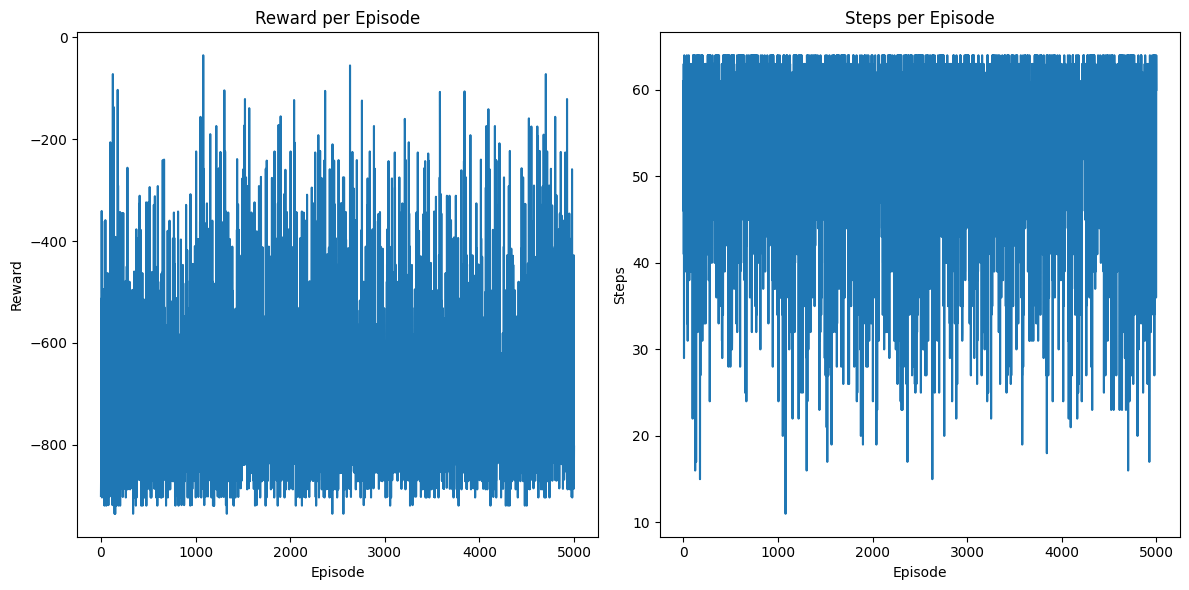

Streaming output truncated to the last 5000 lines.
obs= [[ 1  1  1 -1  0 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0]
 [-1 -1 -1 -1 -1 -1  0 -1]
 [ 0 -1 -1  0 -1 -1  0  0]
 [ 0 -1  0  1 -1 -1 -1 -1]
 [-1 -1  0  0  0 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1]] reward= -17.0 terminated= False
----------------------------------
 | X | X | X | O |   | O | O | O |
----------------------------------
 | O | O | O | O | O | O | O |   |
----------------------------------
 | O | O | O | O | O | O |   | O |
----------------------------------
 |   | O | O |   | O | O |   |   |
----------------------------------
 |   | O |   | X | O | O | O | O |
----------------------------------
 | O | O |   |   |   | O | O | O |
----------------------------------
 | O | O | O | O | O | O | O | O |
----------------------------------
 | X | O | O | O | O | O | O | O |
----------------------------------
Action 52 1 4
obs= [[ 1  1  1 -1  0 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0]
 [-1 -1 -1 -1 -1 -1  0 -1]


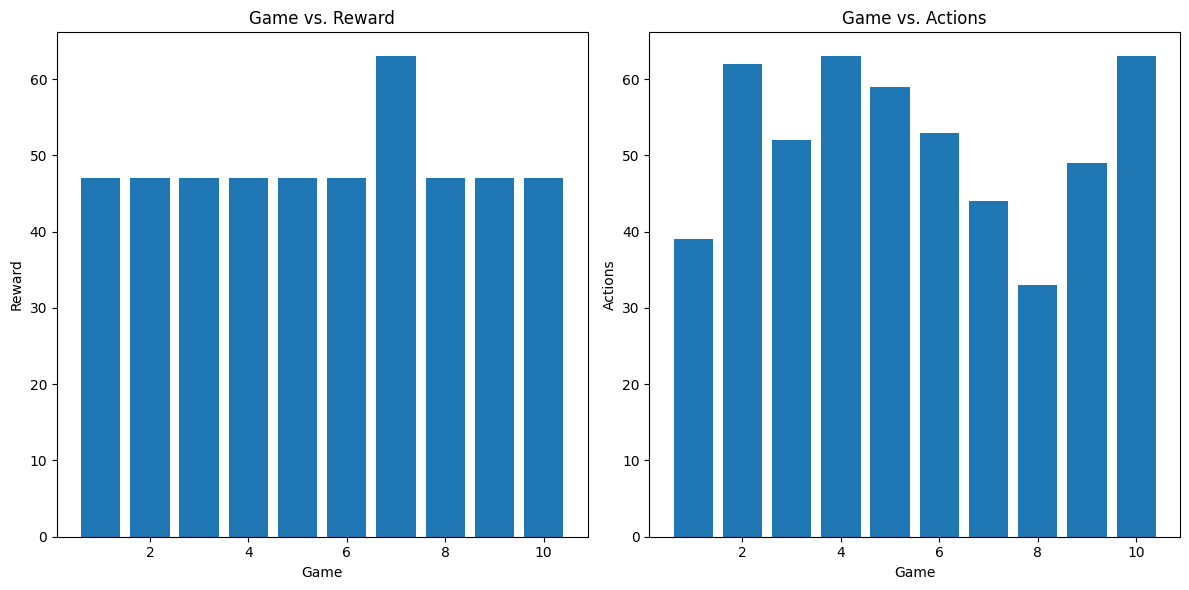

In [ ]:
class BattleshipEnv(gym.Env):
    # Custom Environment that follows gym interface

    metadata = {'render.modes': ['human']}

    def __init__(self, ship_positions, grid_size, ships):

        super(BattleshipEnv, self).__init__()

        # ships
        self.ships = ships

        # board size
        self.grid_size = grid_size

        # cell state encoding (empty, hit, miss)
        self.cell = {'E': 0, 'X': 1, 'O': -1}

        # boards, actions, rewards
        self.board = self.cell['E']*np.ones((self.grid_size, self.grid_size), dtype='int')

        # ship positions
        self.ship_positions = ship_positions

        # enemy_board must be encoded with 0: empty and 1: ship cell
        self.enemy_board = np.zeros((self.grid_size, self.grid_size), dtype='int')
        for ship, locs in self.ship_positions.items():
            for loc in locs:
                self.enemy_board[loc[0], loc[1]] = 1

        # reward discount
        self.rdisc = 0

        self.legal_actions = []  # legal (empty) cells available for moves
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i, j))  # this gets updated as an action is performed

        # Define action and observation space
        self.action_space = spaces.Discrete(self.grid_size * self.grid_size)
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.grid_size, self.grid_size),
                                             dtype=np.int64)

        # For storing data for plotting
        self.episode_rewards = []
        self.episode_steps = []

    def step(self, action):
        state = self.board.copy()
        empty_cnts_pre, hit_cnts_pre, miss_cnts_pre = self.board_config(state)
        i, j = np.unravel_index(action, (self.grid_size, self.grid_size))
        reward = -1

        if (i, j) not in self.legal_actions:
            reward -= 2 * self.grid_size
            action = np.random.choice(len(self.legal_actions))
            i, j = self.legal_actions[action]
            action = np.ravel_multi_index((i, j), (self.grid_size, self.grid_size))

        self.set_state((i, j))
        self.set_legal_actions((i, j))
        next_state = self.board
        empty_cnts_post, hit_cnts_post, miss_cnts_post = self.board_config(next_state)

        sunk_ships = {ship: False for ship in self.ships.keys()}
        for ship, locs in self.ship_positions.items():
            if all(next_state[loc] == self.cell['X'] for loc in locs):
                sunk_ships[ship] = True

        for ship, sunk in sunk_ships.items():
            if sunk:
                for loc in self.ship_positions[ship]:
                    i, j = loc
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            ni, nj = i + di, j + dj
                            if 0 <= ni < self.grid_size and 0 <= nj < self.grid_size and next_state[ni, nj] == self.cell['E']:
                                next_state[ni, nj] = self.cell['O']

        terminated = bool(hit_cnts_post == sum(self.ships.values()))
        truncated = False

        if hit_cnts_post - hit_cnts_pre == 1:
            r_discount = 1
            rp = (self.grid_size * self.grid_size if terminated else self.grid_size)
            reward += rp * r_discount

        reward = float(reward)

        info = {}

        self.episode_rewards[-1] += reward
        self.episode_steps[-1] += 1

        return next_state, reward, terminated, truncated, info

    def reset(self, seed=None):
        info = {}

        self.board = self.cell['E'] * np.ones((self.grid_size, self.grid_size), dtype='int')

        self.legal_actions = []
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.legal_actions.append((i, j))

        self.rdisc = 0
        self.episode_rewards.append(0)
        self.episode_steps.append(0)

        return self.board, info

    def render(self, mode='human'):
        for i in range(self.grid_size):
            print("-" * (4 * self.grid_size + 2))
            for j in range(self.grid_size):
                current_state_value = self.board[i, j]
                current_state = list(self.cell.keys())[list(self.cell.values()).index(current_state_value)]
                current_state = (current_state if current_state != 'E' else ' ')
                print(" | ", end="")
                print(current_state, end='')
            print(' |')
        print("-" * (4 * self.grid_size + 2))

    def board_config(self, state):
        uni_states, uni_cnts = np.unique(state.ravel(), return_counts=True)
        empty_cnts = uni_cnts[uni_states == self.cell['E']]
        hit_cnts = uni_cnts[uni_states == self.cell['X']]
        miss_cnts = uni_cnts[uni_states == self.cell['O']]
        if len(empty_cnts) == 0:
            empty_cnts = 0
        else:
            empty_cnts = empty_cnts[0]
        if len(hit_cnts) == 0:
            hit_cnts = 0
        else:
            hit_cnts = hit_cnts[0]
        if len(miss_cnts) == 0:
            miss_cnts = 0
        else:
            miss_cnts = miss_cnts[0]

        return empty_cnts, hit_cnts, miss_cnts

    def set_state(self, action):
        i, j = action
        if self.enemy_board[i, j] == 1:
            self.board[i, j] = self.cell['X']
        else:
            self.board[i, j] = self.cell['O']

    def set_legal_actions(self, action):
        if action in self.legal_actions:
            self.legal_actions.remove(action)

    def monte_carlo(self, num_episodes, epsilon=0.1, gamma=1.0, alpha=0.1):
        returns_sum = {}
        returns_count = {}
        Q = {}

        for episode in range(num_episodes):
            episode_rewards = []
            state, _ = self.reset()
            done = False

            while not done:
                flat_state = np.array(state).flatten()
                if np.random.rand() < epsilon:
                    action = np.random.choice(self.action_space.n)
                else:
                    action = np.argmax([Q.get((tuple(flat_state), a), 0) for a in range(env.action_space.n)])
                next_state, reward, done, _, _ = self.step(action)
                episode_rewards.append((tuple(flat_state), action, reward))
                state = next_state

            for i, step in enumerate(episode_rewards):
                state, action, reward = step
                flat_state = np.array(state).flatten()
                sa_pair = (tuple(flat_state), action)
                if sa_pair not in returns_sum:
                    returns_sum[sa_pair] = 0
                    returns_count[sa_pair] = 0
                G = sum([x[2] for x in episode_rewards[i:]]) * gamma ** i
                returns_sum[sa_pair] += G
                returns_count[sa_pair] += 1
                Q[sa_pair] = Q.get(sa_pair, 0) + alpha * (G - Q.get(sa_pair, 0))

        self.plot_results()

        return Q

    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.episode_rewards)
        plt.title('Reward per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Reward')

        plt.subplot(1, 2, 2)
        plt.plot(self.episode_steps)
        plt.title('Steps per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        plt.tight_layout()
        plt.show()



# Test environment
ships = {}
ships['Aircraft Carrier'] = 3
ships['Battleship'] = 2
ships['U-boat'] = 1

grid_size = 8

ship_positions = {
    'Aircraft Carrier': [(0, 0), (0, 1), (0, 2)],
    'Battleship': [(4, 2), (4, 3)],
    'U-boat': [(7, 0)]
}

env = BattleshipEnv(ship_positions=ship_positions, grid_size=grid_size, ships=ships)

Q = env.monte_carlo(num_episodes=5000, epsilon=0.1, alpha=0.1)

action_list = []
reward_list = []

# Run the game
for ep in range(10):
    print('Episode', ep)
    obs, _ = env.reset()
    terminated = False
    t = 0
    while not terminated:
        flat_obs = np.array(obs).flatten()
        if np.random.rand() < 0.1:
            action = np.random.choice(env.action_space.n)
        else:
            action = np.argmax([Q.get((tuple(flat_obs), a), 0) for a in range(env.action_space.n)])
        i, j = np.unravel_index(action, (grid_size, grid_size))
        print("Action {}".format(t + 1), i, j)
        obs, reward, terminated, _, _ = env.step(action)
        print('obs=', obs, 'reward=', reward, 'terminated=', terminated)
        env.render()
        t += 1
        if terminated:
            print("Goal reached!", "reward=", reward)
            reward_list.append(reward)
            action_list.append(t)

# Plot game statistics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(reward_list) + 1), reward_list)
plt.title('Game vs. Reward')
plt.xlabel('Game')
plt.ylabel('Reward')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(action_list) + 1), action_list)
plt.title('Game vs. Actions')
plt.xlabel('Game')
plt.ylabel('Actions')

plt.tight_layout()
plt.show()


### 6. Implementation of Parity Search

Streaming output truncated to the last 5000 lines.
obs= [[ 0  0  0 -1  0  0 -1  0]
 [-1 -1 -1  0  0 -1 -1  0]
 [-1  0  0  0 -1  0 -1 -1]
 [ 0  0  0 -1 -1  0 -1  0]
 [-1 -1 -1 -1 -1  0 -1  0]
 [ 1  1  1 -1 -1  0 -1  0]
 [-1 -1 -1  0 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1 -1  1  1]] reward= -17 terminated= False
----------------------------------
 |   |   |   | O |   |   | O |   |
----------------------------------
 | O | O | O |   |   | O | O |   |
----------------------------------
 | O |   |   |   | O |   | O | O |
----------------------------------
 |   |   |   | O | O |   | O |   |
----------------------------------
 | O | O | O | O | O |   | O |   |
----------------------------------
 | X | X | X | O | O |   | O |   |
----------------------------------
 | O | O | O |   | O | O | O | O |
----------------------------------
 |   | O | O | O | O | O | X | X |
----------------------------------
Action 41 7 2
obs= [[ 0  0  0 -1  0  0 -1  0]
 [-1 -1 -1  0  0 -1 -1  0]
 [-1  0  0 -1 -1  0 -1 -1]
 [

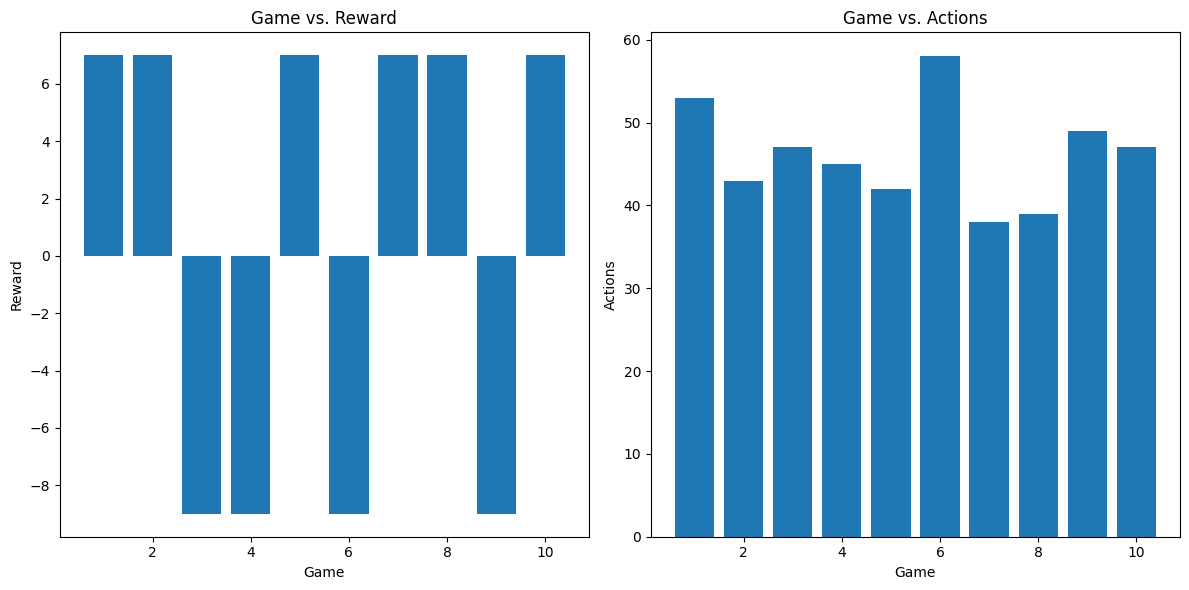

In [ ]:
class BattleshipEnvParity(gym.Env):
    """Custom Environment that follows gym interface"""
    metadata = {'render.modes': ['human']}

    def __init__(self, enemy_board, ship_locs, grid_size, ships):
        super(BattleshipEnvParity, self).__init__()

        # Ships
        self.ships = ships

        # Board size
        self.grid_size = grid_size
        # Cell state encoding (empty, hit, miss)
        self.cell = {'E': 0, 'X': 1, 'O': -1}

        # Boards and rewards
        self.board = self.cell['E'] * np.ones((self.grid_size, self.grid_size), dtype='int')
        self.enemy_board = enemy_board
        self.ship_locs = ship_locs
        self.is_enemy_set = False

        # Initialize the enemy board if not already set
        if self.enemy_board is None:
            self.enemy_board = 0 * np.ones((self.grid_size, self.grid_size), dtype='int')
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)
            self.is_enemy_set = True

        # Reward discount
        self.rdisc = 0

        # Legal (empty) cells available for moves
        self.legal_actions = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]

        # Define action and observation spaces
        self.action_space = spaces.Discrete(self.grid_size * self.grid_size)
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.grid_size, self.grid_size), dtype=np.int64)

        # Maintain high-priority cells for hunting mode
        self.hunting_targets = []

    def step(self, action):
        # If there are hunting targets, use one of those instead
        if self.hunting_targets:
            i, j = self.hunting_targets.pop(0)
            action = np.ravel_multi_index((i, j), (self.grid_size, self.grid_size))
        else:
            # Unravel the action coordinates generated by the agent
            i, j = np.unravel_index(action, (self.grid_size, self.grid_size))

        # Base reward is a penalty for any action
        reward = -1

        # Penalty for illegal actions
        if (i, j) not in self.legal_actions:
            reward -= 2 * self.grid_size
            action_idx = np.random.randint(0, len(self.legal_actions))
            i, j = self.legal_actions[action_idx]
            action = np.ravel_multi_index((i, j), (self.grid_size, self.grid_size))

        # Set the new state after performing the action
        self.set_state((i, j))

        # Update legal actions and remove the current cell
        self.set_legal_actions((i, j))

        next_state = self.board

        # If a hit is made, add neighboring cells to hunting targets
        if next_state[i, j] == self.cell['X']:
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + di, j + dj
                if (0 <= ni < self.grid_size) and (0 <= nj < self.grid_size) and (ni, nj) in self.legal_actions:
                    self.hunting_targets.append((ni, nj))

            reward += self.grid_size

        terminated = bool(np.sum(next_state == self.cell['X']) == sum(self.ships.values()))
        truncated = False

        info = {}

        return next_state, reward, terminated, truncated, info

    def reset(self, seed=None):
        # Reset the board and available legal actions
        self.board = self.cell['E'] * np.ones((self.grid_size, self.grid_size), dtype='int')
        self.legal_actions = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.hunting_targets = []

        if self.is_enemy_set:
            self.enemy_board = 0 * np.ones((self.grid_size, self.grid_size), dtype='int')
            self.ship_locs = {}
            for ship in self.ships:
                self.ship_locs[ship] = []
                self.enemy_board, self.ship_locs = set_ship(ship, self.ships, self.enemy_board, self.ship_locs)

        self.rdisc = 0
        info = {}
        return self.board, info

    def render(self, mode='human'):
        for i in range(self.grid_size):
            print("-" * (4 * self.grid_size + 2))
            for j in range(self.grid_size):
                current_state_value = self.board[i, j]
                current_state = list(self.cell.keys())[list(self.cell.values()).index(current_state_value)]
                current_state = current_state if current_state != 'E' else ' '
                print(" | ", end="")
                print(current_state, end='')
            print(' |')
        print("-" * (4 * self.grid_size + 2))

    def board_config(self, state):
        # Provide a count of empty, hit, and missed cells
        uni_states, uni_cnts = np.unique(state.ravel(), return_counts=True)
        empty_cnts = uni_cnts[uni_states == self.cell['E']] if len(uni_states) > 0 else [0]
        hit_cnts = uni_cnts[uni_states == self.cell['X']] if len(uni_states) > 0 else [0]
        miss_cnts = uni_cnts[uni_states == self.cell['O']] if len(uni_states) > 0 else [0]

        return empty_cnts[0], hit_cnts[0], miss_cnts[0]

    def set_state(self, action):
        i, j = action
        if self.enemy_board[i, j] == 1:
            self.board[i, j] = self.cell['X']
        else:
            self.board[i, j] = self.cell['O']

    def set_legal_actions(self, action):
        if action in self.legal_actions:
            self.legal_actions.remove(action)

# Test environment
# ships
ships = {}
# Added more ships, so there is a variety and to test out makring around sunken ships
ships['Aircraft Carrier'] = 3
ships['Battleship'] = 2
ships['U-boat'] = 1

grid_size=8   # Set to 8, larger grid for our own game
env = BattleshipEnvParity(enemy_board=None, ship_locs={}, grid_size=grid_size, ships=ships)
action_list = []
reward_list = []

for ep in range(10): #Change how many runs
    print('Episode', ep)
    obs = env.reset()
    #env.render()
    #print(env.enemy_board)
    terminated = False
    t = 0

    while not terminated:
        action = env.action_space.sample()
        while(action % 2 != 0):
          action = env.action_space.sample()
        i, j = np.unravel_index(action, (grid_size,grid_size))
        print("Action {}".format(t + 1), i, j)
        obs, reward, terminated, truncated, info = env.step(action)
        print('obs=', obs, 'reward=', reward, 'terminated=', terminated)
        env.render()
        t += 1
        if terminated:
            print("Goal reached!", "reward=", reward)
            reward_list.append(reward)
            action_list.append(t)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(reward_list) + 1), reward_list)
plt.title('Game vs. Reward')
plt.xlabel('Game')
plt.ylabel('Reward')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(action_list) + 1), action_list)
plt.title('Game vs. Actions')
plt.xlabel('Game')
plt.ylabel('Actions')

plt.tight_layout()
plt.show()

### 7. Results and Final Remarks
#### **Process**
In this project we showed the possibility of an A.I. play and win the game, Battleship, through various reinforcement learning algorithms. The algorithms we looked at for our project entials: Epsilon-Greedy Q-Learning, Heat Map, Monte Carlo and Parity Search to accomplish winning with the fewest moves and highest reward (for the algorithms we were able to implement it for).

 We started our project by researching these algorithms along with some base code that has partially achieved this problem. Which we came across Alessio Tamburro's implementation and code. We imported the code to our notebook and tried to run it to test if his code worked, which it did not fully, due to old libraries and modules he was using, which his publication was in 2020, so some of these libraries either went out of commision or needed to be updated to latest version. So our group went though and fixed all the errors, updated the libraires or change them to fit the code and make it work.
  
After getting the initial code to work, our next goal was to make the game more fitted to our standards and make the game bigger. We did this by making the grid to an 8x8 instead of 5x5 as it was and added two more ships. The initial code had just one ship that was 3 cells long, and so we added another two which were 2-long and 1-long cell ships. The other thing we wanted to change is the battleship placement, due to making it more than one ship, we wanted to create the rule like the original battleship game of having it to where the ships cannot be next to each other, has to be 1 cell apart in any direction. This helps prevent confusion for the A.I.(e.g: if the 3 and 2 cell longed ships were side by side vertically, the A.I. does not know which ship is being hit and may think that one of the ships is horzontally). The other rule we wanted to implement is: if a ship is fully sunk, meaning all the cells is hit, then the surrounding cells in every direction is marked as visited. This just helps makign the game go faster so the A.I. doesn't try to hit those spots even though there should be no ship due to the other rule we added.

Now that we have the environment created and game set, we implemented the changes above to the epsilon-greedy learning method. After, all three of us focused on one of the algorithms we found: Nate worked on heat map, which had two modes of searching (random and checkerboard), James worked on Parity Search and Trevor worked on the Monte Carlo. As well to those three algorithms we worked on, Trevor also focused on getting a human testing environment, this allowed the team to play games of the game Battleship, so we can compare human thinking to the A.I. algorithms. The algorithms we explored are explained in each section of their respective spots in this notebook.

#### **Results**

##### *Human Test:*
We only ran five games for this one due to how long it took to play each game due to it being 64 cells and having to type in the x,y coordinates. But after playing five games with various strategies that we came up with(e.g: starting in middle and working outwards in spiral like pattern), that would be hard to code for an A.I., we got decent results on how many tries we got. The lowest number of actions we took were 23 and highest of 46, with average of 32.6 actions. On one game we were able to get the two bigger ships within a dozen moves but trying to find *the* 1-long cell ship, it took another 15-20 tries, so there is a lot of luck with this game but some strategies can make it go faster.

##### *Epsilon-Greedy Q-Learning:*
For the epsilon-Greedy Q-Learing, we wanted to expand a bit upon what was already implemented for the original code base. After we made the changes that were discuessed, we got results that were a bit suprising. It did have several games that preformed in an optimal matter, however the average was on the higher end of guesses. One problem that could be causing this to flare upwards would be the q representaiton. In Epsilon-Greedy Q-Learning, the representation of the the table is extremely important, and for a gamespace the size of battleship, it can have an extreme determining factor on the outcome of the game. If we had more time, we would have liked to try implementing this q-table in a more "deep learning" manner to see if we could have improved the average number of moves. As well, it may have benfitted us to explore different reward architectures to find a balance between exploration and explitation to possibly limit the number moves. Finally, in the future, we could have run the game over several hundred thousand games to see if this impacted our results, as with a game like battleship, 50,000 games may not have been enough to fully encapsulate the space.


##### *Heat Map:*


*   Random Search

The performance of the random search heat map in the Battleship environment showcased both the potenial this type of appraoch has along with the downsides of its work. Although we saw the random search as one of the worst ways to appraoch this problem, we were plesantly suprised by its results. The random search gave us the lowest number of moves out of all of the games, that being 14. Of course, we were not suprised to see the random search had a higher average of 55.6. We believe that the low scores of the random search can be attribuited to the natural randomness of the game of battleship, which genearlly doesn't follow a systematic approach when placing ships on the map. Although there may be strategy involved, the majority of the game is pure luck.

*   Checkerboard Search

The preformance of the checkerboard search was a bit suprising to us. We would expect a more systematic approach to have a lower average guessing rate with more consistant numbers, however that was not he case that we saw. We saw the checkerboard hold only a slighty lower average number of moves, that being 56.4, compare to the random search. With the systematic and structured nature of the checkerboard pattern, we expected  it to preform much better than random search. One particular statistic that suprised us was the fact that the lowest possible moves that checkerboard was able to obtain was 34, which is one of the highest we have amongst all of the runs. However, after some consideration, this does partly make sense. A checkerboard search apptern would struggle against any ships placed into an arrangment not covered by the checkerboard pattern. These findings underscore that systematic approaches like the checkerboard pattern might not always yield improvements over less structured strategies, especially in games where opponent configurations are unknown and vary greatly. Battleship is an extremely random game, and this might explain why a more systematic approach struggled as much as it did.

##### *Monte Carlo:*
For this algorithm, we expected it not return good results due to how the algorithm is not meant for this type of reinforcement learning A.I. We ended with the worst results our of all the algorithms, which the lowest was 33 moves and highest was 63 moves with average of 56.7. This means that it almost filled the entire board before it found all of them, espically the last trial which was the worst with 63 out the 64 cells. But it was an interesting algorithm to add to our project to test how a bad A.I. algorithm for this game results to.



##### *Parity Search:*
For this algorithm, we expected for this algorithm to work well. We expected for this algorithm to work well due to our research on the parity algorithm from the article made by datagenetics. The parity algorithm works by looking at the game board as a checkerboard and only choosing one color of the square.The idea behind the parity algorithm is that a two-unit destroyer will always cover one of the colored squares. Once the parity search algorithm hit one of the ships, it would go into hunt mode. In hunt mode, the algorithm would start shooting at surrounding the square that was hit. The hunt algorithm could be improved if the AI knew it had sunk the ship. The second way our hunt algorithm could be improved is by choosing horizontal or vertical squares if it keeps hitting the target two times in a row. The Parity Search algorithm's best number of moves were in the early 30s and late 20s and at worst performed in the 50s. Overall The parity search algorithm performed slightly better than randomly shooting.




#### **Future Work if we continued**
If we continued this project and got more time to work on this, there would be a few things we would have done differently and improved on. First of all we would have found more algorithms that could acheive better results. When we started this project we looked at doing basic Q-learning but found out we can not do this due to Q-learning needing all possible outcomes which for our game, that would be 8x8x64! = 8.12x10^90 outcomes, which is impossible to achieve. So we looked at other ways of Q-learning and was deciding also on doing a Neural Network like what we did in class with the Tic-Tac-Toe game but we did not get it to work so we did the other three algorithms. Another thing we would do is improve our algorithms with the hyperparaters and running it for longer episodes. The last thing we could have done is more results and testing, making all the algorithms run a few dozen games and as well as more games for human results. But overall I think we accomplished enough and answered our main question if A.I. can defeat the classic Battleship game. SHIP SUNK!

### 8. Citations
Tamburro, A. (2020, March 30). An artificial intelligence learns to play battleship. Medium. https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01  

Deep reinforcement learning–of how to win at battleship. GA. (n.d.). https://www.ga-ccri.com/deep-reinforcement-learning-win-battleship#:~:text=One%20basic%20method%20is%20to,decaying%20to%2010%25%20worked%20well  

DataGenetics http://datagenetics.com/blog/december32011/index.html

baeldung, W. by: (2023, March 24). Epsilon-Greedy Q-Learning. Baeldung on Computer Science. https://www.baeldung.com/cs/epsilon-greedy-q-learning  

Choudhary, A. (2024, February 26). Reinforcement learning: Monte Carlo in reinforcement learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/11/reinforcement-learning-introduction-monte-carlo-learning-openai-gym/

Laken, P. van der. (2019, December 30). Beating battleships with algorithms and ai. paulvanderlaken.com. https://paulvanderlaken.com/2019/01/21/beating-battleships-with-algorithms-and-ai/  

Gymnasium documentation. Gymnasium Documentation. (n.d.). https://gymnasium.farama.org/  

Visualization with python. Matplotlib. (n.d.). https://matplotlib.org/  
